# Import required libraries

In [2]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

# Read the dataset

In [3]:
df = pd.read_csv("test.csv",encoding='latin1')

# Get the details of Dataset

In [4]:
print(df.shape)

(3534, 9)


In [5]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   int64  
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


In [7]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


# Check for null values if any

In [8]:
df.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

# Drop the unnecessary columns

In [9]:
df.drop(['id of the tweet', 'date of the tweet', 'query', 'user'], axis=1, inplace=True)
df.head()

KeyError: "['id of the tweet', 'date of the tweet', 'query', 'user'] not found in axis"

# Get the Information of remaining coloumns 

In [10]:
df.columns = ['sentiment', 'text']

ValueError: Length mismatch: Expected axis has 9 elements, new values have 2 elements

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   int64  
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


In [12]:
df['sentiment'].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

# Visualize the data

<Axes: xlabel='sentiment', ylabel='Count'>

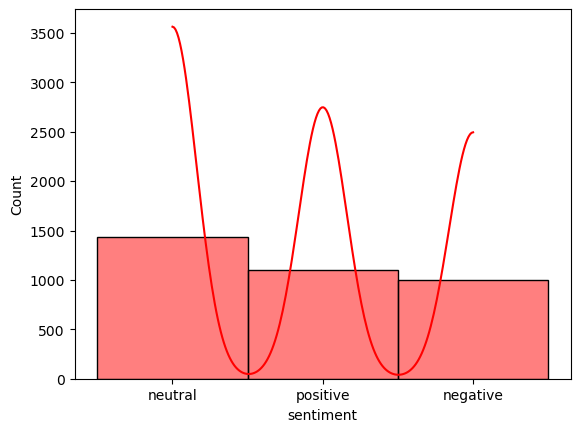

In [13]:
sns.histplot(df['sentiment'], kde=True, color = 'r')

<Axes: xlabel='sentiment', ylabel='count'>

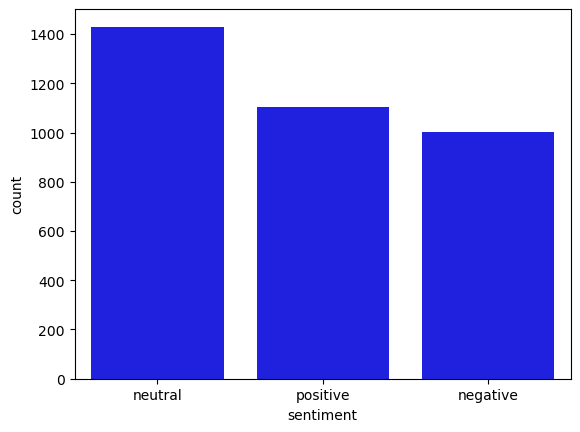

In [14]:
sns.countplot(x=df['sentiment'] , color= 'b')

# Tokenizing the words

In [15]:
word_tokens = [word_tokenize(i) for i in df["text"]]

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [16]:
word_tokens[:3]

NameError: name 'word_tokens' is not defined

# Applying Regular Expression Pattern for removing alphanumeric characters and one or more occurrences of the preceding character

In [17]:
removal = RegexpTokenizer(r"\w+")

In [18]:
new_sentiments = [removal.tokenize(i) for i in df["text"]]

In [19]:
new_sentiments[:3]

[['Last', 'session', 'of', 'the', 'day', 'http', 'twitpic', 'com', '67ezh'],
 ['Shanghai',
  'is',
  'also',
  'really',
  'exciting',
  'precisely',
  'skyscrapers',
  'galore',
  'Good',
  'tweeps',
  'in',
  'China',
  'SH',
  'BJ'],
 ['Recession',
  'hit',
  'Veronique',
  'Branquinho',
  'she',
  'has',
  'to',
  'quit',
  'her',
  'company',
  'such',
  'a',
  'shame']]

# Applying Join on list of strings to form a complete sentence

In [20]:
new_strings = [" ".join(i) for i in new_sentiments]

In [21]:
new_strings[:3]

['Last session of the day http twitpic com 67ezh',
 'Shanghai is also really exciting precisely skyscrapers galore Good tweeps in China SH BJ',
 'Recession hit Veronique Branquinho she has to quit her company such a shame']

# Removing Stopwords

In [22]:
sw = set(stopwords.words("english"))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
new_str_tokens = [word_tokenize(i) for i in new_strings]

In [ ]:
new_str_tokens[:3]

In [ ]:
updated_strings = [[word for word in i if not word in sw] for i in new_str_tokens]

In [ ]:
updated_strings[:3]

# Applying join to form a complete sentence

In [ ]:
dummy_str = [" ".join(i) for i in updated_strings]
dummy_str[:3]

In [ ]:
df["text"] = dummy_str

In [ ]:
df.head()

In [ ]:
df["sentiment"].value_counts()

In [ ]:
df["sentiment"].unique()

# Applying Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(df["text"])

In [ ]:
tokens = tokenizer.texts_to_sequences(df["text"])

In [ ]:
tokens[:5]

# Finding the Vocab size

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
vocab_size

# Converting a series of text data into a series of sequences of integer indices using a tokenizer object

In [ ]:
seq = tokenizer.texts_to_sequences(df["text"])

In [ ]:
seq[:5]

#  Padding a series of sequences of integer indices.

In [ ]:
pad_seq = pad_sequences(seq, maxlen=35, padding="post")

In [ ]:
pad_seq

# Applying LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
labels = le.fit_transform(df["sentiment"])

In [ ]:
labels

In [ ]:
df.head()

# Applying Simple RNN with Sequential Model and Softmax activation 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

# Compiling Model using adam as optimizer

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [ ]:
model.fit(pad_seq, labels, epochs=10)

# Checking if the model works correctly

In [ ]:
new_text = "I am happy, As I scored good marks in test"

In [ ]:
new_tokens = tokenizer.texts_to_sequences([new_text])

In [ ]:
new_tokens

In [ ]:
new_pad_seq = pad_sequences(new_tokens, maxlen=35, padding="post")

In [ ]:
new_pad_seq

In [ ]:
predictions = model.predict(new_pad_seq)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Negetive Sentiment");
else:
    print("Positive Sentiment")